<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Modue-2-Week-1-IP/blob/main/Football_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Footbal Prediction

## 1. Defining the Question

### a) Specifying the Question


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)



### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [118]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import RepeatedKFold
from scipy.stats import bartlett, chi2, loguniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import os
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moringa Core Module 2 Week 1 IP')

Mounted at /content/drive


In [3]:
# Loading the Dataset
fifa = pd.read_csv('fifa_ranking.csv', parse_dates = ['rank_date'])
results = pd.read_csv('results.csv',  parse_dates = ['date'])

## 3. Checking the Data

**Number of records**

In [4]:
# Number of records in the datasets
print(f'FIFA dataset: records = {fifa.shape[0]} and columns = {fifa.shape[1]}')
print(f'Results dataset: records = {results.shape[0]} and columns = {results.shape[1]}')

FIFA dataset: records = 57793 and columns = 16
Results dataset: records = 40839 and columns = 9


**Dataset top preview**

In [5]:
# Previewing the top of our dataset
# FIFA
fifa.head()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [6]:
# Resuts
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Dataset bottom preview**

In [7]:
# Previewing the bottom of our dataset
# FIFA
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
# Results
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


**Checking datatypes**

In [9]:
# Checking whether each column has an appropriate datatype
# FIFA 
fifa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [10]:
# Results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


No datatypes need to be changed.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

## 5. Data Preperation

### a.Validation

**Column relevance**

In [11]:
# Checking for irrelevant columns
# FIFA dataset
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [12]:
# Results dataste
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

There are no irrelevant columns.

### b. Completeness

In [13]:
# Checking for missing values
# FIFA dataset
fifa.isnull().any().any()

False

In [14]:
# Results dataset
results.isnull().any().any()

False

There are no missing values.

### c. Consistency

In [15]:
# Checking for duplicates
# FIFA dataset
fifa.duplicated().any().any()

True

In [16]:
# Dropping duplicates
fifa.drop_duplicates(inplace = True)
# Checking changes
fifa.duplicated().any().any()

False

In [17]:
# Results dataset
results.duplicated().any().any()

False

### d. Uniformity

In [18]:
# Checking column names
# FIFA dataset
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [19]:
# Results dataset
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

The column names are uniform.

### e. Outliers

In [20]:
# Outliers function
def outliers(data, action):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  if action == 'view':
    Q1 = numerical.quantile(0.25)
    Q3 = numerical.quantile(0.75)
    IQR = Q3 - Q1
    # Outliers
    outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(f'Number of outliers = {outliers.shape[0]}')
    print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')
  elif action == 'remove':
    # Removing outliers
    data_no = data.drop(list(outliers.index))
    # Checking changes
    print(f'New dataset shape: {data.shape}')
    return data_no

In [21]:
 # FIFA dataset
outliers(fifa, 'view')

Number of outliers = 21235
Percentage = 36.76674284922778%


In [22]:
# Results dataset
outliers(results, 'view')

Number of outliers = 5683
Percentage = 13.915619873160459%


Outliers will be retained.

**Brief exploration of the datasets**

In [23]:
# Checking unique years in both datasets
fifa.rank_date.dt.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [24]:
# Results dataset
results.date.dt.year.unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

There are fewer years in the fifa dataset, therefore, some ranks will not be available for some records in the results dataset.

Checking records for selected years in both datasets.

In [25]:
# FIFA dataset - 2015
len(fifa[fifa.rank_date.dt.year == 2015]['country_full'].unique())

209

In [26]:
# Results dataset -2015
len(results[results.date.dt.year == 2015]['country'])

1003

In [27]:
# FIFA dataset - 2018
fifa[(fifa.rank_date.dt.year == 2018) & (results.country == 'Germany')][['country_full', 'rank', 'rank_date']].sort_values('country_full')

,country_full,rank,rank_date


In [28]:
# Results dataset - 2018
results[(results.date.dt.year == 2018) & (results.country == 'Germany')][['country', 'date', 'tournament']].sort_values('country')

,country,date,tournament
39579,Germany,2018-03-23,Friendly
39646,Germany,2018-03-27,Friendly
39834,Germany,2018-06-08,Friendly
39952,Germany,2018-09-06,UEFA Nations League
40018,Germany,2018-09-09,Friendly
40213,Germany,2018-11-15,Friendly
40273,Germany,2018-11-19,UEFA Nations League


From the results above, the records do not match, therefore, themerged dataset will contain fewer records when an inner join is performed, so as to obtain the rank column, which is only present in the fifa dataset.

In [29]:
# Copy of the FIFA dataset used to obtain the ranks for the away team during merging
fifa2 = fifa.copy()

In [30]:
# Merging of the results dataset to the two fifa dataframes
merged = pd.merge(pd.merge(results,fifa[['rank', 'country_full','rank_date']], 
                           how = 'inner', left_on= ['date', 'home_team'], 
                           right_on= ['rank_date','country_full']), fifa2[['rank', 'country_full','rank_date']], 
                          how = 'inner', left_on= ['date', 'away_team'], 
                          right_on= ['rank_date','country_full'])

# Dataframe shape
merged.shape

(871, 15)

In [31]:
# Merged dataset with all columns in both datasets, with respest to the home team.
# Merging of the results dataset to the two fifa dataframes
merged_complete = pd.merge(pd.merge(results,fifa, 
                           how = 'inner', left_on= ['date', 'home_team'], 
                           right_on= ['rank_date','country_full']), fifa2, 
                          how = 'inner', left_on= ['date', 'away_team'], 
                          right_on= ['rank_date','country_full'])

# Dataframe shape
merged_complete.shape

(871, 41)

In [32]:
# Merged dataframe preview
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_x,country_full_x,rank_date_x,rank_y,country_full_y,rank_date_y
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,59,Bolivia,1993-08-08,22,Uruguay,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,8,Brazil,1993-08-08,14,Mexico,1993-08-08
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False,35,Ecuador,1993-08-08,94,Venezuela,1993-08-08
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False,65,Guinea,1993-08-08,86,Sierra Leone,1993-08-08
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,67,Paraguay,1993-08-08,5,Argentina,1993-08-08


In [33]:
# Dropping duplicate columns
merged.drop(['country_full_x', 'country_full_y', 'rank_date_x', 'rank_date_y', 'country'], axis = 1, inplace = True)

In [34]:
# Renaming columns
merged.columns.values[-2:] = ['home_tean_rank', 'away_team_rank']
# Confirming changes
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,home_tean_rank,away_team_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False,59,22
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False,8,14
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False,35,94
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False,65,86
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,False,67,5


In [35]:
# Adding a status column
merged['status'] = ''
# Score difference
difference = merged.home_score - merged.away_score
# Filling the status column (W = win, D = draw and L = loss) with resprect to the home team
merged.loc[(merged.home_score - merged.away_score > 0), 'status'] = 'W'
merged.loc[(merged.home_score - merged.away_score == 0), 'status'] = 'D'
merged.loc[(merged.home_score - merged.away_score < 0), 'status'] = 'L'
# Checking changes
merged.head()

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,home_tean_rank,away_team_rank,status
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False,59,22,W
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False,8,14,D
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False,35,94,W
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False,65,86,W
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,False,67,5,L


In [36]:
# Second dataset
# Columns
merged_complete.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_x', 'country_full_x',
       'country_abrv_x', 'total_points_x', 'previous_points_x',
       'rank_change_x', 'cur_year_avg_x', 'cur_year_avg_weighted_x',
       'last_year_avg_x', 'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_date_x', 'rank_y',
       'country_full_y', 'country_abrv_y', 'total_points_y',
       'previous_points_y', 'rank_change_y', 'cur_year_avg_y',
       'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y', 'rank_date_y'],
      dtype='object')

In [37]:
# Dropping unnecessary columns
merged_complete.drop(['country', 'country_full_x', 'country_full_y',
                      'country_abrv_x', 'country_abrv_y', 'rank_date_x', 
                      'rank_date_y' ], axis = 1, inplace =True)

In [38]:
# Checking changes
merged_complete.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'rank_x', 'total_points_x',
       'previous_points_x', 'rank_change_x', 'cur_year_avg_x',
       'cur_year_avg_weighted_x', 'last_year_avg_x',
       'last_year_avg_weighted_x', 'two_year_ago_avg_x',
       'two_year_ago_weighted_x', 'three_year_ago_avg_x',
       'three_year_ago_weighted_x', 'confederation_x', 'rank_y',
       'total_points_y', 'previous_points_y', 'rank_change_y',
       'cur_year_avg_y', 'cur_year_avg_weighted_y', 'last_year_avg_y',
       'last_year_avg_weighted_y', 'two_year_ago_avg_y',
       'two_year_ago_weighted_y', 'three_year_ago_avg_y',
       'three_year_ago_weighted_y', 'confederation_y'],
      dtype='object')

In [39]:
# Renaming columns
merged_complete.rename(columns = {'rank_x':'home_team_rank',
                                  'total_points_x':'home_team_total_points', 
                                  'previous_points_x':'home_team_previous_points',
                                  'rank_change_x':'home_team_rank_change',
                                  'cur_year_avg_x':'home_team_cur_year_avg',
                                  'cur_year_avg_weighted_x':'home_team_cur_year_avg_weighted',
                                  'last_year_avg_x':'home_team_last_year_avg',
                                  'last_year_avg_weighted_x':'home_team_last_year_avg_weighted',
                                  'two_year_ago_avg_x':'home_team_two_year_ago_avg',
                                  'two_year_ago_weighted_x':'home_team_two_year_ago_weighted',
                                  'three_year_ago_avg_x':'home_team_three_year_ago_avg',
                                  'three_year_ago_weighted_x':'home_team_three_year_ago_weighted',
                                  'confederation_x':'home_team_confederation',
                                  'rank_y':'away_team_rank', 'total_points_y':'away_team_total_points',
                                  'previous_points_y':'away_team_previous_points',
                                  'rank_change_y':'away_team_rank_change',
                                  'cur_year_avg_y':'away_team_cur_year_avg',
                                  'cur_year_avg_weighted_y':'away_team_cur_year_avg_weighted',
                                  'last_year_avg_y':'away_team_last_year_avg',
                                  'last_year_avg_weighted_y':'away_team_last_year_avg_weighted',
                                  'two_year_ago_avg_y':'away_team_two_year_ago_avg',
                                  'two_year_ago_weighted_y':'away_team_two_year_ago_weighted',
                                  'three_year_ago_avg_y':'away_team_three_year_ago_avg',
                                  'three_year_ago_weighted_y':'away_team_three_year_ago_weighted',
                                  'confederation_y':'away_team_confederation'}, inplace = True)

In [40]:
# Confirming changes have been made
merged_complete.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'neutral', 'home_team_rank',
       'home_team_total_points', 'home_team_previous_points',
       'home_team_rank_change', 'home_team_cur_year_avg',
       'home_team_cur_year_avg_weighted', 'home_team_last_year_avg',
       'home_team_last_year_avg_weighted', 'home_team_two_year_ago_avg',
       'home_team_two_year_ago_weighted', 'home_team_three_year_ago_avg',
       'home_team_three_year_ago_weighted', 'home_team_confederation',
       'away_team_rank', 'away_team_total_points', 'away_team_previous_points',
       'away_team_rank_change', 'away_team_cur_year_avg',
       'away_team_cur_year_avg_weighted', 'away_team_last_year_avg',
       'away_team_last_year_avg_weighted', 'away_team_two_year_ago_avg',
       'away_team_two_year_ago_weighted', 'away_team_three_year_ago_avg',
       'away_team_three_year_ago_weighted', 'away_team_confederation'],
      dtype='object')

## 6. Exploratory Analysis

### Descriptive Analysis

#### a) Univariate Analysis

##### Categorical columns

In [41]:
categorical = merged.select_dtypes(include = 'object').columns.tolist()

In [42]:
# Ploting the univariate summaries and recording our observations
#

#### Encoding Categorical Columns

In [43]:
# Categorical columns
categorical

['home_team', 'away_team', 'tournament', 'city', 'status']

In [44]:
# Checking unique categories
for cat in categorical:
  print(f'{cat}: {len(merged[cat].unique())}')

home_team: 160
away_team: 159
tournament: 38
city: 399
status: 3


All columns are nominal. Due to the large number of categories, dictvecorizer will be used.

In [45]:
# Feature engineering
merged_modelling = merged.copy()
# Seperating the date column
merged_modelling['year'] = merged_modelling.date.dt.year
merged_modelling['month'] = merged_modelling.date.dt.month
merged_modelling['day'] = merged_modelling.date.dt.day

In [46]:
# Checking changes
merged_modelling.head()

,date,home_team,away_team,home_score,away_score,tournament,city,neutral,home_tean_rank,away_team_rank,status,year,month,day
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,False,59,22,W,1993,8,8
1,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,False,8,14,D,1993,8,8
2,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,False,35,94,W,1993,8,8
3,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,False,65,86,W,1993,8,8
4,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,False,67,5,L,1993,8,8


In [47]:
# Dropping the date column
merged_modelling.drop('date', axis = 1, inplace = True)

#### Multicollinearity Check

In [48]:
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

# Function call
VIF(merged_modelling)

,home_score,away_score,neutral,home_tean_rank,away_team_rank,year,month,day
home_score,1.197269,0.029328,0.010402,0.330137,-0.566063,0.119135,0.024714,0.052410
away_score,0.029328,1.117683,-0.110801,-0.348802,0.344596,0.064317,-0.024880,0.048605
neutral,0.010402,-0.110801,1.035786,0.031103,-0.089682,-0.103478,0.114928,-0.054532
home_tean_rank,0.330137,-0.348802,0.031103,1.633295,-1.007159,-0.139081,0.120248,-0.109764
away_team_rank,-0.566063,0.344596,-0.089682,-1.007159,1.843757,-0.223536,-0.071195,0.085548
year,0.119135,0.064317,-0.103478,-0.139081,-0.223536,1.433017,-0.020495,0.669961
month,0.024714,-0.024880,0.114928,0.120248,-0.071195,-0.020495,1.037189,-0.138885
day,0.052410,0.048605,-0.054532,-0.109764,0.085548,0.669961,-0.138885,1.355943


All VIFs are lower than 5, therefore, multicollinearity is not an issue.

### Modelling

In [49]:
categorical = list(merged_modelling.select_dtypes(include = 'object').columns)
for cat in categorical:
  print(f'{cat}: {len(merged_modelling[cat].unique())}')

home_team: 160
away_team: 159
tournament: 38
city: 399
status: 3


In [50]:
numerical = list(merged_modelling.select_dtypes(exclude = 'object').columns)
numerical

['home_score',
 'away_score',
 'neutral',
 'home_tean_rank',
 'away_team_rank',
 'year',
 'month',
 'day']

In [51]:
# Label encoding
merged_modelling[categorical] = merged_modelling[categorical].apply(LabelEncoder().fit_transform)
merged_modelling.head()

,home_team,away_team,home_score,away_score,tournament,city,neutral,home_tean_rank,away_team_rank,status,year,month,day
0,20,150,3,1,16,169,False,59,22,2,1993,8,8
1,23,90,1,1,17,196,False,8,14,0,1993,8,8
2,40,153,5,0,16,289,False,35,94,2,1993,8,8
3,59,125,1,0,17,78,False,65,86,2,1993,8,8
4,111,7,1,3,16,21,False,67,5,1,1993,8,8


#### Polynomial Regression

In [52]:
def Lda(degree, X_train, X_test, y_train, y_test, components = None):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  print(f'RMSE: {Polynomial(degree, X_train, X_test, y_train, y_test)}')


In [53]:
def Lda_noscale(degree, X_train, X_test, y_train, y_test, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  print(f'RMSE: {Polynomial(degree, X_train, X_test, y_train, y_test)}')

In [54]:
def Residuals_Heteroskedasticity_LDA(degree, X_train, X_test, y_train, y_test, components = None):
  # LDA
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Obtaining ID arrays
  ypred = y_pred_poly.flatten()
  ytest = y_test.flatten()
  # Residuals
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

In [55]:
def Residuals_Heteroskedasticity(degree, X_train, X_test, y_train, y_test, components = None):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degree)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Obtaining ID arrays
  ypred = y_pred_poly.flatten()
  ytest = y_test.flatten()
  # Residuals
  residuals = np.subtract(ypred, ytest)
  print('Residuals Description')
  print(pd.DataFrame(residuals).describe())
  mean = residuals.mean()
  print(f'\nResiduals mean: {mean}')
  
  # Residual plot
  plt.scatter(ypred, residuals, color='black')
  plt.ylabel('Residuals')
  plt.xlabel('Fitted Values')
  plt.axhline(y= mean, color='red', linewidth=1)
  plt.show()

  # Bartlett's test
  test_statistic, p_value = bartlett(ypred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df = len(ypred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')

In [56]:
def Polynomial(degrees, X_train, X_test, y_train, y_test):
  # Polynomial regression
  polynomial = PolynomialFeatures(degree = degrees)
  X_train_poly = polynomial.fit_transform(X_train)
  X_test_poly =  polynomial.transform(X_test)
  # Regression
  poly_reg = LinearRegression()
  poly_reg.fit(X_train_poly, y_train)
  # Predictions
  y_pred_poly = poly_reg.predict(X_test_poly)
  # Model accuracy
  rmse_poly = mean_squared_error(y_test, y_pred_poly , squared = False)
  return rmse_poly

In [156]:
def LogisticReg_LDA(X_train, X_test, y_train, y_test, components = None):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Dimensionality reduction  
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  # Model fitting
  log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
  log_reg.fit(X_train, y_train)
  # Prediction
  y_pred = log_reg.predict(X_test)
  # Evaluation
  score = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Accuracy score: {score}')
  print('\nClassification Report')
  print(report)
  confusion= confusion_matrix(y_test, y_pred)
  print('\nConfusion Matrix')
  print(confusion)

In [155]:
def LogisticReg(X_train, X_test, y_train, y_test):
  # Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Model fitting
  log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
  log_reg.fit(X_train, y_train)
  # Prediction
  y_pred = log_reg.predict(X_test)
  # Evaluation
  score = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  print(f'Accuracy score: {score}')
  print('\nClassification Report')
  confusion= confusion_matrix(y_test, y_pred)
  print('\nConfusion Matrix')
  print(confusion)

**Train-Test Split**

1. Home Team Score Prediction

In [59]:
# Train-test sets
# Home team score prediction
X1 =  merged_modelling.drop('home_score', axis = 1).values
y1 = merged_modelling.home_score.values.reshape(-1, 1)

In [60]:
# Away team score prediction
X2 =  merged_modelling.drop('away_score', axis = 1).values
y2 = merged_modelling.away_score.values.reshape(-1, 1)

In [61]:
# Status prediction
X3 =  merged_modelling.drop('status', axis = 1).values
y3 = merged_modelling.status.values.reshape(-1, 1)

In [62]:
# Normal train-test-split
# Home team score prediction
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [63]:
# Away team score prediction
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [64]:
# Status prediction
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

Polynomial Regression

Home team

In [65]:
# Degree of 1
Polynomial(1, X1_train, X1_test, y1_train, y1_test)

1.0906928835350536

In [66]:
# Degree 2
Polynomial(2, X1_train, X1_test, y1_train, y1_test)

1.1446671022813357

In [67]:
# Degree of 3
Polynomial(3, X1_train, X1_test, y1_train, y1_test)

5.94719291520342

For the home team score prediction set, a polynomial equation whose independent variable is of degree 1 has the lowest RMSE, therefore, the optimal equation is a linear equation.

Away team

In [68]:
# Degree 1
Polynomial(1, X2_train, X2_test, y2_train, y2_test)

1.3181146662958025

In [69]:
# Degree 2
Polynomial(2, X2_train, X2_test, y2_train, y2_test)

0.9435348241871057

In [70]:
# Degree 3
Polynomial(3, X2_train, X2_test, y2_train, y2_test)

2.323892163444685

For the away team score prediction set, a polynomial equation whose independent variable is of degree 2 has the lowest RMSE.

Status

In [150]:
LogisticReg(X3_train, X3_test, y3_train, y3_test)

Accuracy score: 1.0
F1 score: 1.0
Precision score: 1.0
Recall score: 1.0

Confusion Matrix
[[52  0  0]
 [ 0 54  0]
 [ 0  0 69]]


The model achieves a perfect score. This could mean that it is overfitting. Further analysis is required.

Polynomial regression after dimensionality reduction.

In [72]:
# LDA, y = home team score
# Components = None
Lda(1, X1_train, X1_test, y1_train, y1_test)

RMSE: 1.0906928835350531


In [73]:
# LDA, y = home team score
# Components = 1
Lda(1, X1_train, X1_test, y1_train, y1_test, components = 1)

RMSE: 1.0765602203070268


In [74]:
# LDA, y = home team score
# Components = 2
Lda(1, X1_train, X1_test, y1_train, y1_test, components = 2)

RMSE: 1.0859301567977462


y = home team score: (Previous =  RMSE 1.0906928835350536)
1. Number of components = None, RMSE = 1.0907
2. Number of components = 1, RMSE = 1.0766
3. Number of components = 2, RMSE = 1.0859

Therefore, the optimal number of components is 1. Furthermore, scaling the entire dataset and only scaling the numerical columns leads to the same RMSE.

In [75]:
# LDA, y = away team score
# Components = None
Lda(2, X2_train, X2_test, y2_train, y2_test)

RMSE: 1.289945784762126


In [76]:
# LDA, y = away team score
# Components = 1
Lda(2,X2_train, X2_test, y2_train, y2_test, components = 1)

RMSE: 1.317409152298653


In [77]:
# LDA, y = away team score
# Components = 2
Lda(2, X2_train, X2_test, y2_train, y2_test, components = 2)

RMSE: 1.2853837111256683


In [78]:
# LDA, y = away team score
# Components = 3
Lda(2, X2_train, X2_test, y2_train, y2_test, components = 3)

RMSE: 1.2946881655601714


y = away team score: (Previous =  RMSE 0.9435348241871057)
1. Number of components = None, RMSE = 1.3174
2. Number of components = 1, RMSE = 1.2854
3. Number of components = 2, RMSE = 1.2946

Therefore, the optimal number of components is 1. However, the RMSE increses.

In [79]:
# LDA wothout scaling for y = away team score
Lda_noscale(2, X2_train, X2_test, y2_train, y2_test, components = 1)

RMSE: 1.3174091522986526


As per the results, LDA led to an increase in RMSE, therefore, it will not be employed.

In [157]:
# y = status
# Components  = None
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test)

Accuracy score: 0.8628571428571429

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.71      0.76        52
           1       0.91      0.94      0.93        54
           2       0.86      0.91      0.89        69

    accuracy                           0.86       175
   macro avg       0.86      0.86      0.86       175
weighted avg       0.86      0.86      0.86       175


Confusion Matrix
[[37  5 10]
 [ 3 51  0]
 [ 6  0 63]]


In [158]:
# y = status
# Components  = 1
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test, components = 1)

Accuracy score: 0.7942857142857143

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.54      0.62        52
           1       0.84      0.91      0.88        54
           2       0.79      0.90      0.84        69

    accuracy                           0.79       175
   macro avg       0.79      0.78      0.78       175
weighted avg       0.79      0.79      0.79       175


Confusion Matrix
[[28  8 16]
 [ 5 49  0]
 [ 6  1 62]]


In [159]:
# y = status
# Components  = 2
LogisticReg_LDA(X3_train, X3_test, y3_train, y3_test, components = 2)

Accuracy score: 0.8628571428571429

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.71      0.76        52
           1       0.91      0.94      0.93        54
           2       0.86      0.91      0.89        69

    accuracy                           0.86       175
   macro avg       0.86      0.86      0.86       175
weighted avg       0.86      0.86      0.86       175


Confusion Matrix
[[37  5 10]
 [ 3 51  0]
 [ 6  0 63]]


y = status: 

Highest accuracy = 0.8628571428571429

All components will be considered as using all of them result in higher f1, precision and recall scores for the 3 classes.

**Residuals and Heteroscedasticity**

Residuals Description
                0
count  175.000000
mean     0.163067
std      1.067192
min     -3.501242
25%     -0.574790
50%      0.196632
75%      0.940386
max      2.807565

Residuals mean: 0.1630667968321281


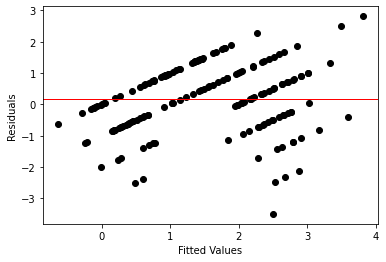


P_Vlaue = 0.4511906854473503
test_statistic = 0.5676589608288581
Critical Value: 176.6333610690193
Variances are equal


In [83]:
# y = home team score
Residuals_Heteroskedasticity_LDA(1, X1_train, X1_test, y1_train, y1_test, 1)

From the Bartlett's test, there is equal variance of the data points as the p-value > 0.05. However, a pattern can be observed.

Residuals Description
                0
count  175.000000
mean     0.160994
std      1.081841
min     -3.757912
25%     -0.528598
50%      0.200083
75%      0.955368
max      3.446996

Residuals mean: 0.16099446520824762


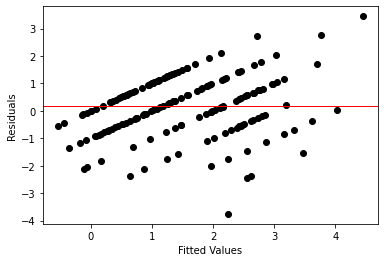


P_Vlaue = 0.5316342469301957
test_statistic = 0.39126684112360305
Critical Value: 172.85624812445278
Variances are equal


In [84]:
# y = away team score
# As the RMSE increased after LDA, the dimensionality reduction method will not be employed.
Residuals_Heteroskedasticity(1, X1_train, X1_test, y1_train, y1_test, 1)

From the Bartlett's test, there is equal variance of the data points as the p-value > 0.05. However, a pattern can be observed.

The patterns in both predictions require further analysis.

For the y = status logistic linear regression, a residual plot will not be generated as differences cannot be calculated for nominal categories, as they have no order, nor quantitative value. 

In [85]:
# Number of records
merged_modelling.shape[0]

871

##### Cross Validation

Employing Leave One Out Cross Validation as the dataset only has around 871 records.

In [86]:
def LeaveOutCV_LDA(X, y, degree, components):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)    
    count = count + 1
  # Number of models and the mean RMSE of all of them.
  print(f'Models = {str(count)}')
  print(f'Mean RMSE = {np.mean(RMSES)}')
  # Plot
  plt.plot(RMSES)
  plt.ylabel('RMSE value')
  plt.xlabel('model ID')
  plt.show()

  

In [128]:
def LeaveOutCV_Logistic_LDA(X, y, components = None):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  accuracies = []
  f1s = []
  precisions = []
  recalls = []
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    # LDA
    lda = LDA(n_components= components)
    X_train = lda.fit_transform(X_train, y_train)
    X_test = lda.transform(X_test)
    # Model fitting
    log_reg = LogisticRegression(multi_class='auto', solver='lbfgs')
    log_reg.fit(X_train, y_train)
    # Prediction
    y_pred = log_reg.predict(X_test)
    # Evaluation
    score = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')
    accuracies.append(score)
    f1s.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    model.append(count)
    count += 1
  print(f'Models trained: {len(model)}')
  print(f'\nFinal Accuracy score: {score}\n')
  print(f'Final Precision score: {f1}\n')
  print(f'Final Recall score: {recall}\n')
  print(f'\nMean Accuracy score: {np.mean(score)}\n')
  print(f'Mean F1 score: {np.mean(f1s)}\n')
  print(f'Mean Precision score: {np.mean(precisions)}\n')



  

In [87]:
def LeaveOutCV(X, y, degree):
  # KFold object
  folds = LeaveOneOut()
  # Number of models
  model = []
  # List of RMSEs
  RMSES = [] 
  count = 0 
  # Cross Validation
  for train_index, test_index in folds.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # LDA
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    rmse_value = Polynomial(degree, X_train, X_test, y_train, y_test)
    RMSES.append(rmse_value)    
    count = count + 1
  # Number of models and the mean RMSE of all of them.
  print(f'Models = {str(count)}')
  print(f'Mean RMSE = {np.mean(RMSES)}')
  # Plot
  plt.plot(RMSES)
  plt.ylabel('RMSE value')
  plt.xlabel('model ID')
  plt.show()

  

Models = 871
Mean RMSE = 0.9813135081858065


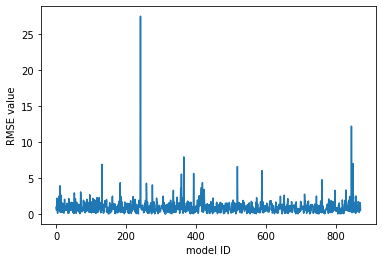

In [110]:
# y = home team score
LeaveOutCV_LDA(X1, y1, 1, 1)

The RMSE has reduced from 1.0766 to 0.9813. An of around 0.9 seems to be the best that can be achieved.

Models = 871
Mean RMSE = 0.5391119951665633


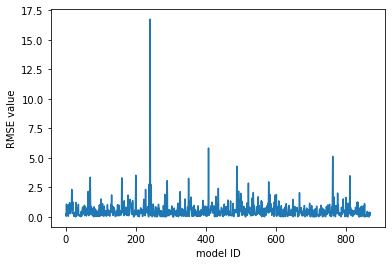

In [89]:
# y = away team score
LeaveOutCV(X2, y2, 2)

The RMSE has reduced from 0.9435 to 0.5391 after LeaveOveOut cross validation.

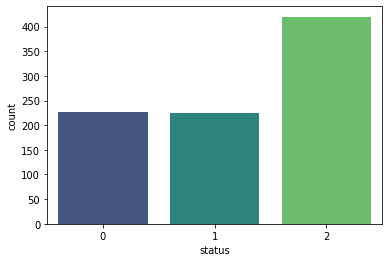

In [120]:
# Checking for class imbalance
sns.countplot(x='status',data= merged_modelling, palette='viridis')

* There is a class imbalance between the draw and loss classes, and the win class. Therefore, weighted averages will be used to compute the F1, precision and recall scores.
*  Accuracy is considered a poor choice for imbalanced datasets as it gives high scores to models which just predict the most frequent class. This could be the reason for the perfect accuracy score of 1.


In [154]:
# y = status
LeaveOutCV_Logistic_LDA(X3, y3)

Models trained: 871

Final Accuracy score: 1.0

Final Precision score: 1.0

Final Recall score: 1.0


Mean Accuracy score: 1.0

Mean F1 score: 0.9230769230769231

Mean Precision score: 0.9230769230769231



##### Hyperparameter Tuning

As the LinearRgression model does not have hyperparameters [link](https://www.analyticsvidhya.com/blog/2021/04/evaluating-machine-learning-models-hyperparameter-tuning/) [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), therefore, the Ridge linear regression model will be used.

In [90]:
grid = dict()
grid ['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
grid ['alpha'] = np.arange(0, 1, 0.01)
grid ['fit_intercept'] = [True, False]
grid ['normalize'] = [True, False]

Grid Search

In [91]:
# Grid search function
def Grid_LDA(X, y, params, components):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Model
  model = Ridge()
  # Grid search
  grid = GridSearchCV(model, params, scoring = 'neg_root_mean_squared_error', cv = 10, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')



In [92]:
# Grid search function
def Grid(X, y, params):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # Model
  model = Ridge()
  # Grid search
  grid = GridSearchCV(model, params, scoring = 'neg_root_mean_squared_error', cv = 10, verbose = 1, n_jobs = -1)
  # Hyperparameter tuning
  grid.fit(X, y)
  # Best parameters
  print(f'Best parameters: {grid.best_params_}')
  # Best scores
  print(f'Best scores: {grid.best_score_}')

In [93]:
# Grid Search
# y = home team score
Grid_LDA(X1, y1, grid, 1)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best parameters: {'alpha': 0.5, 'fit_intercept': True, 'normalize': False, 'solver': 'sag'}
Best scores: -1.4879054756870045


In [94]:
# y = away team score
Grid(X2, y2, grid)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
Best parameters: {'alpha': 0.03, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}
Best scores: -1.0856042688905734


Ridge regression has a lower performance. However, this could be caused by the low number of folds (10), as compared to the 871 folds used previously. This will not be confirmed as the procedure is computationally expensive. However, Random Forest Regressor will be used to compare the performance of both models.

In [ ]:
# Random forest regressor grid search
# Hyperparameters to be tested
rf_grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}




In [ ]:
# Random forest regressor grid search
def RSearch_LDA(X, y, params, components):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # LDA
  lda = LDA(n_components= components)
  X = lda.fit_transform(X, y)
  # Regression model
  model = RandomForestRegressor()
  gs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            scoring = 'neg_root_mean_squared_error',
                            n_iter=100, 
                            cv=5, 
                            verbose=2)
  # Model training
  gs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {gs_model.best_params_}')
  # Best scores
  print(f'Best scores: {gs_model.best_score_}')

In [ ]:
# Random forest regressor without LDA
def RSearch(X, y, params):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # Regression model
  model = RandomForestRegressor()
  gs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            scoring = 'neg_root_mean_squared_error',
                            n_iter=100,
                            cv=5,
                            verbose=2)
  # Model training
  gs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {gs_model.best_params_}')
  # Best scores
  print(f'Best scores: {gs_model.best_score_}')

In [ ]:
# y = home team score
RSearch_LDA(X1, y1, rf_grid, 1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estim

In [ ]:
# y = away team score
RSearch(X2, y2, rf_grid)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1000; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, 

#### Polynomial Regression 2

In [ ]:
# Train-test sets
X = merged_modelling.drop('away_score', axis = 1).values
y = merged_modelling.values.reshape(-1, 1)

## 7. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?